In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris = iris[['petal_length', 'petal_width']]
dataset_heading = ["petal_length", "petal_width"]
x_train = iris.iloc[:, 0].values
y_train = iris.iloc[:, 1].values

In [5]:
def compute_train_model(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w*x[i] + b
    
    return f_wb

In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    j_wb = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        j_wb += (f_wb - y[i]) ** 2
         
    return j_wb / (2*m)

In [7]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    return dj_dw/m, dj_db/m

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m = x.shape[0]
    w = w_in
    b = b_in
    
    j_hist = []
    p_hist = []
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
            p_hist.append([w, b])
            
        
    
    return w, b, j_hist, p_hist

In [15]:
alpha = 0.01
num_iter = 10000
w_in = 0
b_in = 0

w, b, j_hist, p_hist = gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)

In [16]:
w, b

(0.4157554130053505, -0.3630755061365379)

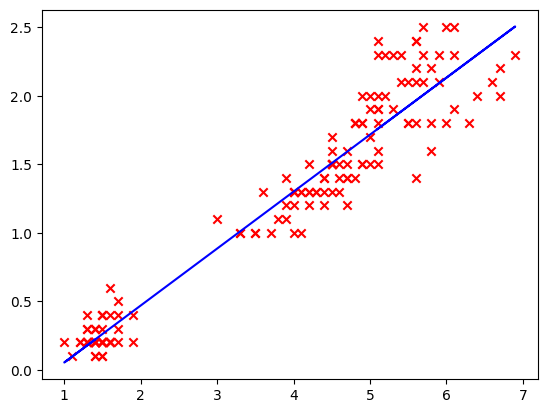

In [17]:
f_wb = compute_train_model(x_train, w, b)
y_pred = w*x_train + b
plt.plot(x_train, f_wb, c="b")
plt.scatter(x_train, y_train, marker="x", c="r")
plt.show()

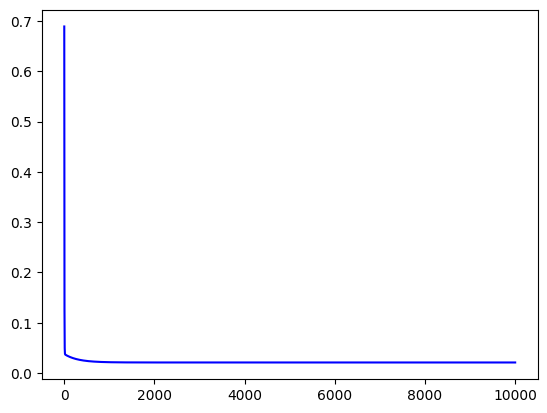

In [18]:
plt.plot(j_hist, c="b")
plt.show()